# Zahra Ghahremani
- Student ID: 114141861
**Collaborate with: Yavar Pourmohamad*

# PS2
Put your homework in the directory with your name. Please mention in this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. To complete your homework, you may ONLY consult the following material:

- lecture slides
- course notes you or others took during lecture.
- the required text
- websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems.

Please provide an answer to the following question:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1 (15 pts)
Implement the fit and predict procedures for the logistic regression (scikit is not allowed) with norm 2 regularization function (and Lambda parameter).
Use as the input parameters of the gradient ascent the maximum number of iterations (just a constant e.g 100) and the learning factor (e.g. 0.01).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split , StratifiedKFold, KFold, cross_validate, learning_curve, GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dataset = pd.read_csv(filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep = ',', header = 0)
dataset.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print(dataset.head())
print(dataset.describe())

   sepal length  sepal width  petal length  petal width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
       sepal length  sepal width  petal length  petal width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


- To know better our data, the feature distribution will be inspected.

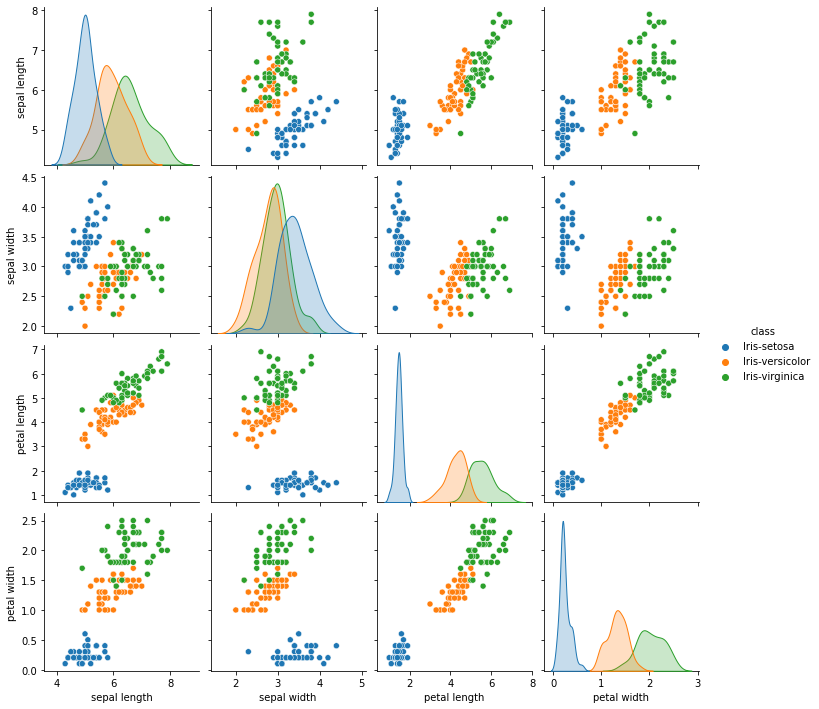

In [5]:
sns.pairplot(data = dataset, hue = 'class')

Now lets see our target variable:

In [6]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

lets make it a binery traget vatiable with versicolor = 1 and the rest being zero.

In [7]:
dataset['class'] = dataset['class'].apply(lambda x: 1  if x == 'Iris-versicolor' else 0)
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# **creating  test and training samples**


In [8]:
test = dataset.sample(frac = 0.2)
print(test.head())
train_mask = pd.Series(True, index = dataset.index)
print(train_mask)
train_mask[test.index] = False
train = dataset[train_mask]
print(train.head())

     sepal length  sepal width  petal length  petal width  class
4             5.4          3.9           1.7          0.4      0
87            5.6          3.0           4.1          1.3      1
9             5.4          3.7           1.5          0.2      0
132           6.3          2.8           5.1          1.5      0
34            5.0          3.2           1.2          0.2      0
0      True
1      True
2      True
3      True
4      True
       ... 
144    True
145    True
146    True
147    True
148    True
Length: 149, dtype: bool
   sepal length  sepal width  petal length  petal width  class
1           4.7          3.2           1.3          0.2      0
2           4.6          3.1           1.5          0.2      0
3           5.0          3.6           1.4          0.2      0
6           5.0          3.4           1.5          0.2      0
7           4.4          2.9           1.4          0.2      0


In [9]:
train_X = train[['sepal length', 'sepal width', 'petal length', 'petal width']]
train_Y = train['class']
test_X = test[['sepal length', 'sepal width', 'petal length', 'petal width']]
test_Y = test['class']

**standardize the data**

In [10]:
StdS = StandardScaler()
StdS.fit(train_X)
train_X_std = pd.DataFrame(StdS.transform(train_X), columns = {'sepal length', 'sepal width', 'petal length', 'petal width'})
test_X_std = pd.DataFrame(StdS.transform(test_X), columns = {'sepal length', 'sepal width', 'petal length', 'petal width'})
train_X_std.head()

,sepal width,petal width,petal length,sepal length
0,-1.346466,0.372030,-1.389952,-1.299476
1,-1.464717,0.135284,-1.277585,-1.299476
2,-0.991715,1.319017,-1.333769,-1.299476
3,-0.991715,0.845524,-1.277585,-1.299476
4,-1.701218,-0.338210,-1.333769,-1.299476


let's check if data are actually standardized:

In [11]:
train_X_std.describe()

,sepal width,petal width,petal length,sepal length
count,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,2.100327e-16,3.461284e-16,-1.147541e-16,-4.450222e-16
std,1.004228e+00,1.004228e+00,1.004228e+00,1.004228e+00
min,-1.819468e+00,-2.468930e+00,-1.558503e+00,-1.428234e+00
25%,-8.734641e-01,-5.749562e-01,-1.221402e+00,-1.170719e+00
50%,-4.571029e-02,-1.014629e-01,2.955537e-01,1.168555e-01
75%,6.637929e-01,6.087771e-01,7.450219e-01,7.606426e-01
max,2.437551e+00,3.212990e+00,1.756325e+00,1.661944e+00


**Implement Logistic Regression with l2 norm**

lets create a class of our nessesary functions:

In [12]:
class Functions:
    """This function returns function values as well as their derivatives"""
    
    def __init__(self):
        self.func_value = 0
    
    def sigmoid(self, Pval):
        sig = (1 / (1 + np.exp(-Pval)))
        return sig

    def predict_probability(self, features, weights):
        Pval = np.dot(features, weights) 
        PP = self.sigmoid(Pval)
        return PP

    def log_likelihood(self, features, label, weights):
        indicator = (label == +1)
        scores = np.dot(features, weights)
        ll = np.sum((np.transpose(np.array([indicator])) - 1) * scores - np.log(1. + np.exp(-scores)))
        return ll

    def derivative(self, errors, feature):
        derivative = np.dot(np.transpose(errors), feature)
        return derivative

    def l2_derivative(self, errors, feature, weight, l2_penalty, feature_is_constant):
        derivative = np.dot(np.transpose(errors), feature)
        if not feature_is_constant:
            derivative -= 2 * l2_penalty * weight
        return derivative

    def l2_log_likelihood(self, features, labels, weights, l2_penalty):
        indicator = (labels == +1)
        scores = np.dot(features, weights)
        ll = np.sum((np.transpose(np.array([indicator])) -1 ) * scores - np.log(1. + np.exp(-scores))) - (l2_penalty * np.sum(weights[1:] ** 2))
        return ll

Now lets build a logistic regression with L2 regularization with gradient ascent

In [13]:
def l2_logistic_regression(features, labels, lr, max_itr, l2_penalty):
    
  # add bias (intercept) with features matrix
    bias = np.ones((features.shape[0], 1))
    features = np.hstack((bias, features))

  # initialize the weight coefficients
    weights = np.zeros((features.shape[1], 1))
    logs = []

  # loop over max_itr times
    for epoch in range(max_itr):
        # predict probability for each row in the dataset
        predictions = Functions().predict_probability(features, weights)

        # calculate the indicator value
        indicators = (labels == +1)

        # calculate the errors
        errors = np.transpose(np.array([indicators])) - predictions
        # loop over each weight coefficient
        for j in range(len(weights)):
            isIntercept = (j == 0)
            # calculate the derivative of jth weight cofficient for gradient ascent
            derivative = Functions().l2_derivative(errors, features[:,j], weights[j], l2_penalty, isIntercept)
            #update based on gradient ascent
            weights[j] += lr * derivative

        # compute the log-likelihood
        ll = Functions().l2_log_likelihood(features, labels, weights, l2_penalty)
        logs.append(ll)

    x = np.linspace(0, len(logs), len(logs))
    C = 1 / l2_penalty


    return {'weights': weights, 'X_value': x, 'LL': logs, 'C': C}

In [14]:
learning_rate = 1e-2
max_itr = 100
l2_penalty = 0.1
out1 = l2_logistic_regression(train_X_std, train_Y, learning_rate, max_itr, l2_penalty)
learning_rate = 1e-2
l2_penalty = 1
out2 = l2_logistic_regression(train_X_std, train_Y, learning_rate, max_itr, l2_penalty)
learning_rate = 1e-2
l2_penalty = 10
out3 = l2_logistic_regression(train_X_std, train_Y, learning_rate, max_itr, l2_penalty)
learning_rate = 1e-4
l2_penalty = 100
out4 = l2_logistic_regression(train_X_std, train_Y, learning_rate, max_itr, l2_penalty)

**Results:**

intiate ploting

<Figure size 432x288 with 0 Axes>

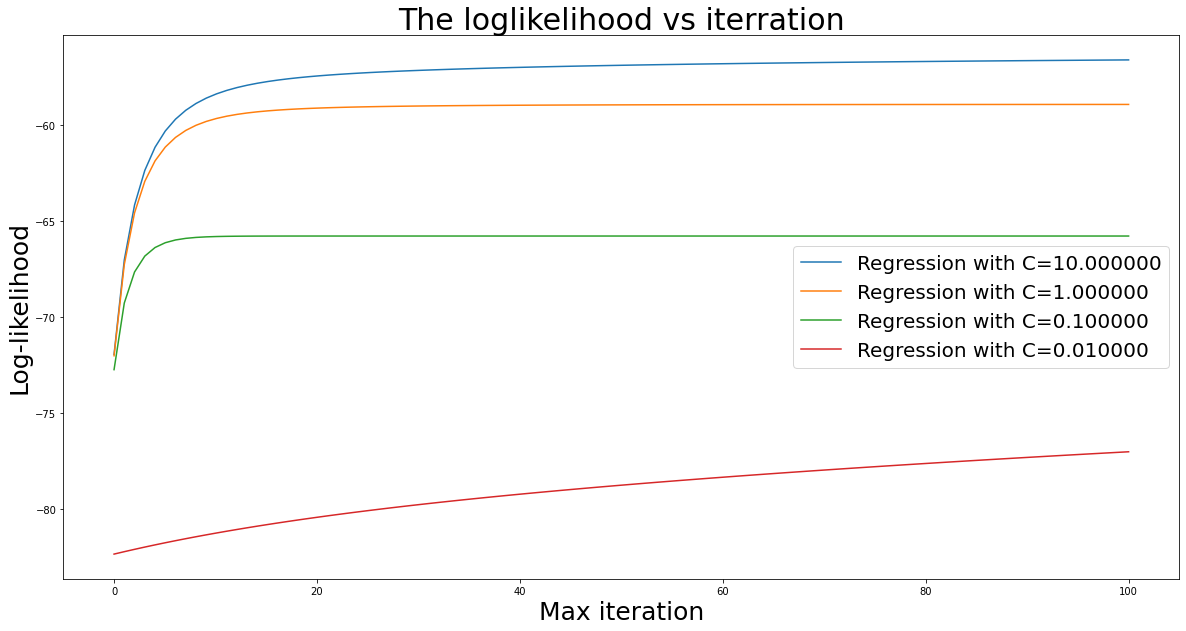

In [15]:
fig = plt.figure()
plt.figure(figsize = (20, 10))
line1, = plt.plot(out1['X_value'], out1['LL'])
line2, = plt.plot(out2['X_value'], out2['LL'])
line3, = plt.plot(out3['X_value'], out3['LL'])
line4, = plt.plot(out4['X_value'], out4['LL'])
plt.title('The loglikelihood vs iterration', fontsize = 30)
plt.xlabel('Max iteration', fontsize = 25)
plt.ylabel('Log-likelihood', fontsize = 25)
plt.legend([line1, line2, line3, line4], ['Regression with C=%f' %out1['C'], 'Regression with C=%f' %out2['C'], 'Regression with C=%f' %out3['C'], 'Regression with C=%f' %out4['C']], fontsize = 20)
plt.show()

Setup confusion matrix and find the goodness of fit

In [16]:
bias_test = np.ones((test_X_std.shape[0], 1))
test_X_new = np.hstack((bias_test, test_X_std))
bias_train = np.ones((train_X_std.shape[0], 1))
train_X_new = np.hstack((bias_train, train_X_std))

train_predictions = (Functions().predict_probability(train_X_new, out4['weights']).flatten() > 0.5)
train_predictions = train_predictions.astype('int')
test_predictions  = (Functions().predict_probability(test_X_new, out4['weights']).flatten() > 0.5)
test_predictions = test_predictions.astype('int')

train['predicted'] = train_predictions
test['predicted'] = test_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


**Training**

In [17]:
train['correct'] = abs(train['class'] - train['predicted'])
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal length,sepal width,petal length,petal width,class,predicted,correct
1,4.7,3.2,1.3,0.2,0,0,0
2,4.6,3.1,1.5,0.2,0,0,0
3,5.0,3.6,1.4,0.2,0,0,0
6,5.0,3.4,1.5,0.2,0,0,0
7,4.4,2.9,1.4,0.2,0,0,0


In [18]:
confusion_train = train.groupby(['class', 'predicted'])['sepal length'].count()
confusion_train.unstack()

predicted,0,1
class,,
0,81,1
1,34,3


<Figure size 432x288 with 0 Axes>

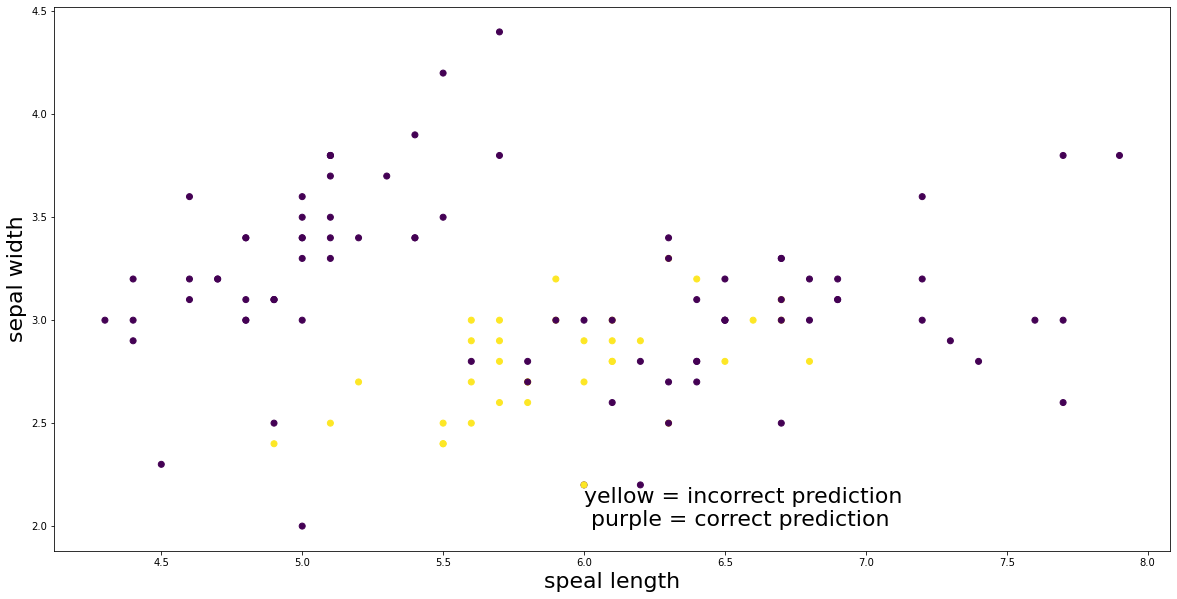

In [19]:
fig = plt.figure()
plt.figure(figsize = (20, 10))
plt.scatter(train['sepal length'], train['sepal width'], c = train['correct'])
plt.xlabel('speal length', fontsize = 22)
plt.ylabel('sepal width', fontsize = 22)
plt.text(6, 2, 'yellow = incorrect prediction \n purple = correct prediction', fontsize = 22)
plt.show()

In [20]:
print('The Logistic regression accuracy for training data is: ',(confusion_train[0][0] + confusion_train[1][1]) / sum(confusion_train))

The Logistic regression accuracy for training data is:  0.7058823529411765


**Testing**

In [21]:
test['correct'] = abs(test['class'] - test['predicted'])
test.head()

,sepal length,sepal width,petal length,petal width,class,predicted,correct
4,5.4,3.9,1.7,0.4,0,0,0
87,5.6,3.0,4.1,1.3,1,0,1
9,5.4,3.7,1.5,0.2,0,0,0
132,6.3,2.8,5.1,1.5,0,0,0
34,5.0,3.2,1.2,0.2,0,0,0


In [22]:
confusion_test = test.groupby(['class', 'predicted'])['sepal length'].count()
confusion_test.unstack()

predicted,0
class,
0,17
1,13


<Figure size 432x288 with 0 Axes>

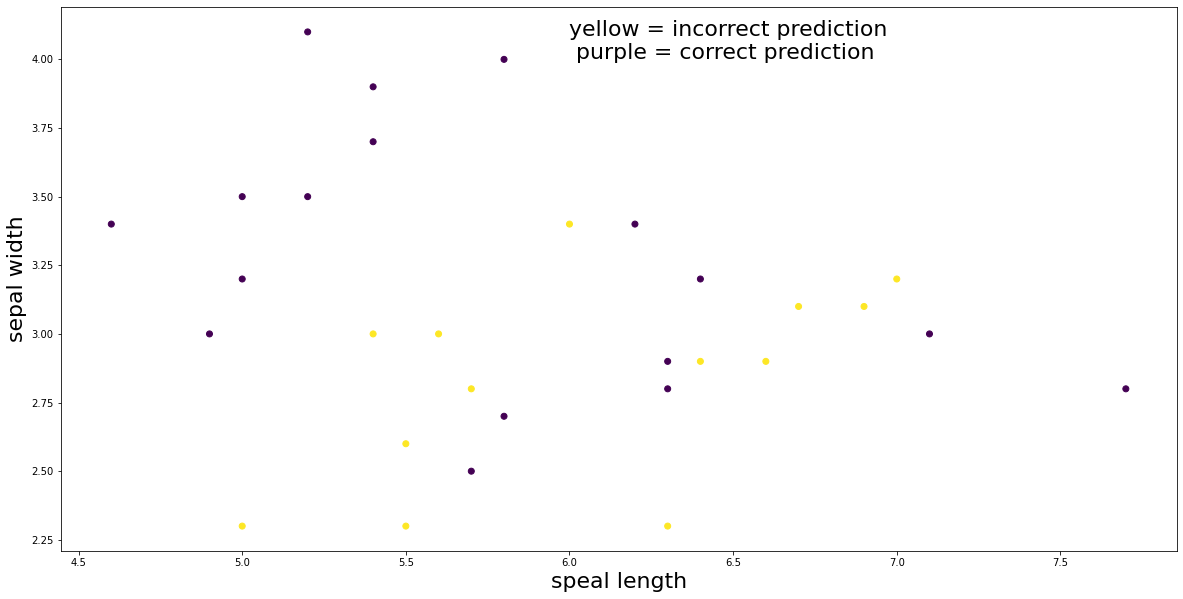

In [23]:
fig = plt.figure()
plt.figure(figsize = (20, 10))
plt.scatter(test['sepal length'], test['sepal width'], c = test['correct'])
plt.xlabel('speal length', fontsize = 22)
plt.ylabel('sepal width', fontsize = 22)
plt.text(6, 4, 'yellow = incorrect prediction \n purple = correct prediction', fontsize = 22)
plt.show()

In [25]:
print('The Logistic regression accuracy for training data is: ',(confusion_test[0][0] + confusion_test[1][1]) / sum(confusion_test))

KeyError: ignored

# Question 2 (20 pts)
Use the iris dataset (just the binary class Iris Setosa vs others), the K-fold cross validation, metrics(accuracy, precision, recall, F1-score) and the logistic regression with L2 regularization.
You can use scikit.
Please estimate the best parameter C(the inverse of lambda)

Use the iris dataset (just the binary class Iris Setosa vs others), the K-fold cross validation, metrics(accuracy, precision, recall, F1-score) and the logistic regression with L2 regularization. You can use scikit. Please estimate the best parameter C(the inverse of lambda)


In [43]:
dataset = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/Spring 2022-MS-Semester2/ML/Notebooks/Copy of iris.csv', sep = ",", header = 0)
print(dataset)
dataset.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

dataset['class'] = dataset['class'].apply(lambda x: 1  if x == 'Iris-versicolor' else 0)


test = dataset.sample(frac = 0.2)
#print(test)
train_mask = pd.Series(True, index = dataset.index)
#print(train_mask)
train_mask[test.index] = False
#print(train_mask.head())
train = dataset[train_mask]
#print(train)

train_X = train[['sepal length', 'sepal width', 'petal length', 'petal width']]
print(train_X)
train_Y = train['class']
test_X = test[['sepal length', 'sepal width', 'petal length', 'petal width']]
print(test_X)
test_Y = test['class']

StdS = StandardScaler()
StdS.fit(train_X)
train_X_std = pd.DataFrame(StdS.transform(train_X), columns = {'sepal length', 'sepal width', 'petal length', 'petal width'})
test_X_std = pd.DataFrame(StdS.transform(test_X), columns = {'sepal length', 'sepal width', 'petal length', 'petal width'})
train_X_std.head()

      f1   f2   f3   f4           class
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
5             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
143           6.8          3.2           5.9          2.3
145           6.7          3.0  

,sepal width,petal width,petal length,sepal length
0,-0.84351,0.966320,-1.266773,-1.261317
1,-1.08683,-0.166086,-1.266773,-1.261317
2,-1.33015,0.286876,-1.323410,-1.261317
3,-1.45181,0.060395,-1.210136,-1.261317
4,-0.47853,1.872245,-1.096863,-0.994607


In [ ]:
import warnings
warnings.filterwarnings("ignore")
C = np.logspace(-10, 10, 20)
scoring = ['accuracy','precision', 'recall', 'f1']
Output_train = pd.DataFrame(columns = ['C_value', 'mean_accuracy','mean_Recall','mean_Precision','mean_F1_score'])
Output_test = pd.DataFrame(columns = ['C_value', 'mean_accuracy','mean_Recall','mean_Precision','mean_F1_score'])
i = 0
for c in C:
    kfold = model_selection.KFold(n_splits = 5, random_state = 4, shuffle = True)
    model=LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear', fit_intercept = True)
    CV_results_train = cross_validate(estimator = model, X = train_X_std, y = train_Y, cv = kfold, scoring = scoring)
    Output_train.loc[i] = [c, CV_results_train['test_accuracy'].mean(), CV_results_train['test_precision'].mean(), CV_results_train['test_recall'].mean(), CV_results_train['test_f1'].mean()]
    CV_results_test = cross_validate(estimator = model, X = test_X_std, y = test_Y, cv = kfold, scoring = scoring)
    Output_test.loc[i] = [c, CV_results_test['test_accuracy'].mean(), CV_results_test['test_precision'].mean(), CV_results_test['test_recall'].mean(), CV_results_test['test_f1'].mean()]
    i += 1

**Training results:**

In [ ]:
Output_train

,C_value,mean_accuracy,mean_Recall,mean_Precision,mean_F1_score
0,1.000000e-10,0.616667,0.405556,0.600758,0.460952
1,1.128838e-09,0.616667,0.405556,0.600758,0.460952
2,1.274275e-08,0.616667,0.405556,0.600758,0.460952
3,1.438450e-07,0.616667,0.405556,0.600758,0.460952
4,1.623777e-06,0.616667,0.405556,0.600758,0.460952
5,1.832981e-05,0.616667,0.405556,0.600758,0.460952
6,2.069138e-04,0.616667,0.405556,0.600758,0.460952
7,2.335721e-03,0.608333,0.396465,0.578535,0.446667
8,2.636651e-02,0.691667,0.440556,0.417172,0.400654
9,2.976351e-01,0.758333,0.540000,0.461616,0.470445


**Testing resut**

In [ ]:
Output_test

,C_value,mean_accuracy,mean_Recall,mean_Precision,mean_F1_score
0,1.000000e-10,0.366667,0.100000,0.066667,0.080000
1,1.128838e-09,0.366667,0.100000,0.066667,0.080000
2,1.274275e-08,0.366667,0.100000,0.066667,0.080000
3,1.438450e-07,0.366667,0.100000,0.066667,0.080000
4,1.623777e-06,0.366667,0.100000,0.066667,0.080000
5,1.832981e-05,0.366667,0.100000,0.066667,0.080000
6,2.069138e-04,0.366667,0.100000,0.066667,0.080000
7,2.335721e-03,0.366667,0.100000,0.066667,0.080000
8,2.636651e-02,0.366667,0.100000,0.066667,0.080000
9,2.976351e-01,0.466667,0.500000,0.223333,0.260952


According to the table the best values of C according to the training datset are those that are after row number 6 and according to testing dataset is all of them, However for indepth search and more precise one we can use the gridsearch tool.

In [ ]:
grid = {"C" : np.logspace(-10, 10, 2000), "penalty" : ["l1", "l2"]}
logreg = LogisticRegression(fit_intercept = True)
logreg_cv = GridSearchCV(logreg, grid, cv = 10)
logreg_cv.fit(train_X_std, train_Y)
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.1092323098103958, 'penalty': 'l2'}
accuracy : 0.75


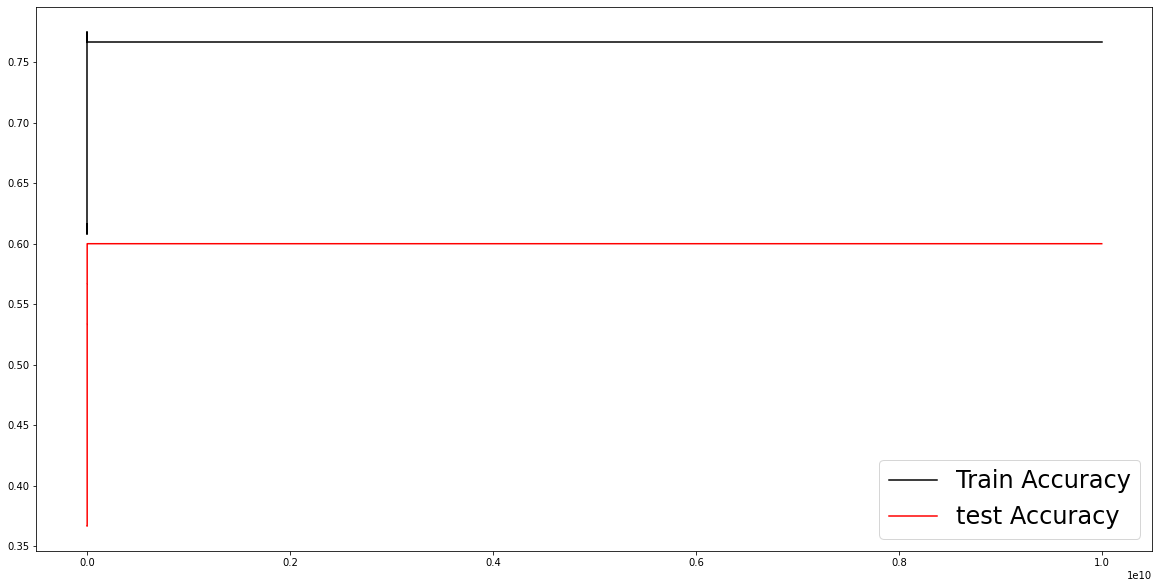

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(C, Output_train.groupby(['C_value'])['mean_accuracy'].mean(), 'k')
plt.plot(C, Output_test.groupby(['C_value'])['mean_accuracy'].mean(), 'r')
plt.legend(("Train Accuracy", "test Accuracy"), fontsize = 24)